# Bulldozer Price Prediction 

**In this project, we are going to predict the price of bulldozers with the help of a machine learning model.**

## 1. Problem definition

> How efficiently can we predict the sales price of the bulldozers, given its characteristics and previous examples

## 2. Data

The data is downloaded from the Kaggle bluebook for bulldozers:
The data for this competition is split into three parts:

The datasets are:
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

The key fields are in train.csv are:
* SalesID: the uniue identifier of the sale
* MachineID: the unique identifier of a machine.  A machine can be sold multiple times
* saleprice: what the machine sold for at auction (only provided in train.csv)
* saledate: the date of the sale
There are several fields towards the end of the file on the different options a machine can have.  The descriptions all start with "machine configuration" in the data dictionary.  Some product types do not have a particular option, so all the records for that option variable will be null for that product type.  Also, some sources do not provide good option and/or hours data.
The machine_appendix.csv file contains the correct year manufactured for a given machine along with the make, model, and product class details. There is one machine id for every machine in all the competition datasets (training, evaluation, etc.).

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

Check it on: https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

## 4. Features

* SalesID: unique identifier of a particular sale of a machine at auction
* MachineID: identifier for a particular machine; machines may have multiple sales
* ModelID: identifier for a unique machine model (i.e. fiModelDesc)
* datasource: source of the sale record
* auctioneerID: identifier of a particular auctioneer, i.e. company that sold the machine at auction. 
* YearMade: year of manufacturer of the Machine
* MachineHoursCurrentMeter: current usage of the machine in hours at time of sale (saledate)
* UsageBand: value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage
* Saledate: time of sale
* Saleprice: cost of sale in USD
* fiModelDesc: Description of a unique machine model (see ModelID)
* fiBaseModel: disaggregation of fiModelDesc
* fiSecondaryDesc: disaggregation of fiModelDesc
* fiModelSeries: disaggregation of fiModelDesc
* fiModelDescriptor: disaggregation of fiModelDesc
* ProductSize: The size class grouping for a product group. 
* ProductClassDesc: description of 2nd level hierarchical grouping (below ProductGroup) of fiModelDesc
* State: US State in which sale occurred
* ProductGroup: identifier for top-level hierarchical grouping of fiModelDesc
* ProductGroupDesc: description of top-level hierarchical grouping of fiModelDesc
* Drive_System: machine configuration; typcially describes whether 2 or 4 wheel drive
* Enclosure: machine configuration - does machine have an enclosed cab or not
* Forks: machine configuration - attachment used for lifting
* Pad_Type: machine configuration - type of treads a crawler machine uses
* Ride_Control: machine configuration - optional feature on loaders to make the ride smoother
* Stick: machine configuration - type of control
* Transmission: machine configuration - describes type of transmission; typically automatic or manual
* Turbocharged: machine configuration - engine naturally aspirated or turbocharged
* Blade_Extension: machine configuration - extension of standard blade
* Blade_Width: machine configuration - width of blade
* Enclosure_Type: machine configuration - does machine have an enclosed cab or not
* Engine_Horsepower: machine configuration - engine horsepower rating
* Hydraulics: machine configuration - type of hydraulics
* Pushblock: machine configuration - option
* Ripper: machine configuration - implement attached to machine to till soil
* Scarifier: machine configuration - implement attached to machine to condition soil
* Tip_control: machine configuration - type of blade control
* Tire_Size: machine configuration - size of primary tires
* Coupler: machine configuration - type of implement interface
* Coupler_System: machine configuration - type of implement interface
* Grouser_Tracks: machine configuration - describes ground contact interface
* Hydraulics_Flow: machine configuration - normal or high flow hydraulic system
* Track_Type: machine configuration - type of treads a crawler machine uses
* Undercarriage_Pad_Width: machine configuration - width of crawler treads
* Stick_Length: machine configuration - length of machine digging implement
* Thumb: machine configuration - attachment used for grabbing
* Pattern_Changer: machine configuration - can adjust the operator control configuration to suit the user
* Grouser_Type: machine configuration - type of treads a crawler machine uses
* Backhoe_Mounting: machine configuration - optional interface used to add a backhoe attachment
* Blade_Type: machine configuration - describes type of blade
* Travel_Controls: machine configuration - describes operator control configuration
* Differential_Type: machine configuration - differential type, typically locking or standard
* Steering_Controls: machine configuration - describes operator control configuration

Link: https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

## Preparing the tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## Loading the data

In [2]:
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv", low_memory = False)

## Data exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
#See how many missing values are there
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

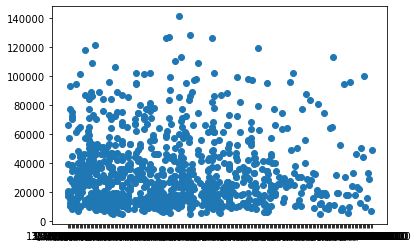

In [6]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

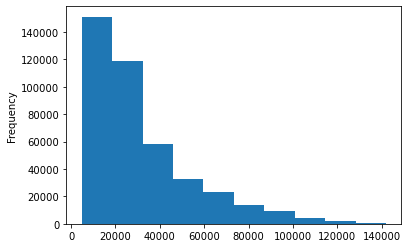

In [8]:
df.SalePrice.plot.hist();

### Parsing dates

When we work with time series data, we need to enrich the time and date as much as possible.

We can do that using `pandas` by telling that which of our columns has dates in it, using the `parse_dates` parameter.

In [3]:
# Import the data again but this time using parse dates
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False,
                parse_dates=["saledate"])

In [10]:
#See the Saledate dtype now -
df.saledate.dtype

dtype('<M8[ns]')

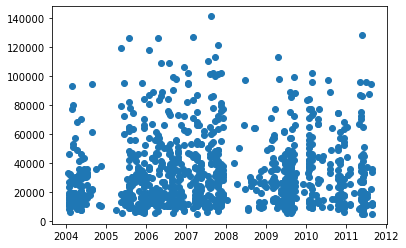

In [11]:
#Make the same plot as before
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [12]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Sort DataFrame by date
df.sort_values(by=["saledate"], inplace=True, ascending=True)

In [14]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [5]:
#Maintain a copy of the original dataframe as well
df_copy = df.copy()

### Add datetime attributes for the `saledate` column

In [6]:
df_copy["saleYear"] = df_copy.saledate.dt.year
df_copy["saleMonth"] = df_copy.saledate.dt.month
df_copy["saleDay"] = df_copy.saledate.dt.day
df_copy["saleDayOfWeek"] = df_copy.saledate.dt.dayofweek
df_copy["saleDayOfYear"] = df_copy.saledate.dt.dayofyear

In [17]:
df_copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [7]:
#Now that we have segregated the date time, we can remove the saledate column
df_copy.drop("saledate", axis=1, inplace=True)

In [20]:
df_copy.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling

In [8]:
#Import the ML Model
from sklearn.ensemble import RandomForestRegressor

#Build a model
model = RandomForestRegressor(n_jobs=-1,
                             random_state=43) #Same as np.random.seed(43)

### Convert strings to numbers

In [10]:
#As we can see that all the column datatypes are not present in numbers. 
#So, we first need to convert it to nos. so that we can fit it in a model.

#Find all the columns that contain strings
for label, content in df_copy.items():
    if pd.api.types.is_string_dtype(content): #(See doc.) - check if it is string
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [11]:
#Turn all the string values into categories
for label, content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        df_copy[label] = content.astype("category").cat.as_ordered()
        #Change the content of those string columns as categories

In [12]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [13]:
df_copy.state.cat.codes
#Example - See how the 'state' column values has been assigned a no.
#after being converted to categories

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

### Take care of the missing values

In [14]:
(df_copy.isna().sum()/len(df_copy)) * 100 #See the percentage of missing values

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

### Fill the missing values

#### i. Filling numerical missing values 

In [15]:
#Find all the columns that contain numerical data
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content): #(See doc.) - check if it is string
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [16]:
#Check which numeric columns have null values
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content): #(See doc.) - check if it is string
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [9]:
#Fill the null numeric values with the median value
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content): #(See doc.) - check if it is string
        if pd.isnull(content).sum():
            #Add a binary column which tells us if the data was missing
            df_copy[label+"_is_missing"] = pd.isnull(content)
            #Fill missing numeric values with median
            df_copy[label] = content.fillna(content.median())

In [10]:
#Check again with the previous code if there are still any missing values
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content): #(See doc.) - check if it is string
        if pd.isnull(content).sum():
            print(label)

In [11]:
#As we can see that there is no output, there are no NULL values present

#### ii. Filling categorical missing values

In [12]:
#Check which non-numeric columns have null values
for label, content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content): #(See doc.) - check if it is string
        if pd.isnull(content).sum():
            print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [14]:
#Example - see categories for 'state'
pd.Categorical(df_copy["state"])

['Texas', 'Florida', 'Florida', 'Florida', 'Florida', ..., 'California', 'California', 'California', 'California', 'California']
Length: 412698
Categories (53, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming']

In [15]:
#Turn categorical var. into nos. and fill the missing
for label, content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add a binary column which tells us if the data was missing
            df_copy[label+"_is_missing"] = pd.isnull(content)
            #Turn categories into nos. and add +1
            df_copy[label] = pd.Categorical(content).codes + 1
            #We are adding '+1' because the ones which have missing values
            #has a 'codes' value of '-1', but we want only +ve nos.

In [16]:
#Check where the dataset stands now
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


In [17]:
#One last check to see if there are remaining missing values
df_copy.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

**Now that we don't have any missing values and all are turned into nos., 
we must be able to fit it in the model**

In [19]:
%%time

# Instantiate model
model = RandomForestRegressor(n_jobs=-1, random_state = 42)

#Instantiate the X and y labels
X = df_copy.drop("SalePrice", axis = 1)
y = df_copy["SalePrice"]

#Fit the model
model.fit(X, y)

CPU times: total: 32min 34s
Wall time: 2min 55s


RandomForestRegressor(n_jobs=-1, random_state=42)

### Splitting data into training/validation sets

In [20]:
df_copy.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [21]:
#Split data into training and validation

#Contain values of the year 2012 only
df_val = df_copy[df_copy.saleYear == 2012] 
#Contain values of other years
df_train = df_copy[df_copy.saleYear != 2012]

In [23]:
#Again split into X and y train and validation sets

X_train, y_train = df_train.drop("SalePrice", axis = 1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis = 1), df_val.SalePrice

**Building an evaluation function**

In [28]:
#Building an evaluation func. based on root-mean-squared-log-error
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root-mean-squared-log-error between predictions 
    and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

#Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE":mean_absolute_error(y_train, train_preds),
             "Valid MAE": mean_absolute_error(y_valid, val_preds),
             "Training RMSLE":rmsle(y_train, train_preds),
             "Valid RMSLE": rmsle(y_valid, val_preds),
             "Training R^2": r2_score(y_train, train_preds),
             "Valid R^2": r2_score(y_valid, val_preds)}
    
    return scores

#### Testing our model on a subset (to tune the hyperparameters)

In [25]:
#Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000)
#Done in order to reduce the time needed to train the model
#Earlier it took around 3 min. With max_samples = 10000 (<len(X_train)),
#the time should reduce

In [26]:
%%time

#Trying the new model
model.fit(X_train, y_train)

CPU times: total: 1min 5s
Wall time: 9.51 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [29]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

In [30]:
# NOTE: The 'Valid MAE' is slightly larger than the 'Training MAE' 
# which means that we are not 'overfitting the model'

## 6. Experimentation

**Hyperparameter tuning with RandomizedSearchCV**

In [35]:
%%time

from sklearn.model_selection import RandomizedSearchCV

#Different hyperparameters for the model
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

#Instantiate the model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                                   random_state = 42),
                                                   param_distributions=rf_grid,
                                                   n_iter=10,
                                                   cv=5,
                                                   verbose=True)

#Fit the model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 3min 41s
Wall time: 3min 42s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [36]:
#Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 14,
 'min_samples_leaf': 7,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [37]:
# Evaluate the model
show_scores(rs_model)

{'Training MAE': 5948.9702344420375,
 'Valid MAE': 7538.217144432056,
 'Training RMSLE': 0.2714579305766537,
 'Valid RMSLE': 0.3027549846609489,
 'Training R^2': 0.8384235696497322,
 'Valid R^2': 0.8078998080165694}

**Train the model with better hyperparameters**

In [38]:
# In the previous example, we have set the 'n_iter' to only 10.
# To get better results, use large values of n_iter like 100, 200, etc.
# But that may take even hours to train and get the best results

In [39]:
%%time

#Instantiate the model
best_model = RandomForestRegressor(n_estimators=40,
                                  min_samples_leaf=1,
                                  min_samples_split=14,
                                  max_features=0.5,
                                  n_jobs=-1,
                                  max_samples=None,
                                  random_state=42)

#Fit the model (on the entire data, not a subset of 10000)
best_model.fit(X_train, y_train)

CPU times: total: 6min 40s
Wall time: 40.1 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [40]:
show_scores(best_model)

{'Training MAE': 2953.6472620828085,
 'Valid MAE': 5967.8731667724105,
 'Training RMSLE': 0.14453018464479883,
 'Valid RMSLE': 0.24693891098459292,
 'Training R^2': 0.9589450037007156,
 'Valid R^2': 0.8814018840852685}

In [41]:
#As we can see, the RMSLE Score has significantly reduced

## Make predictions on the test dataset

In [42]:
#Now that we have trained our model, we need to evaluate it on the
# 'Test.csv' dataset to see how well it predicts

In [43]:
df_test = pd.read_csv("bluebook-for-bulldozers/Test.csv",
                     low_memory=False,
                     parse_dates=["saledate"])

In [44]:
#Getting the test dataset in the same format as the training dataset
def preprocess_data(df):
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    #Remove the saledate column
    df.drop("saledate", axis = 1, inplace=True)
    
    #Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

In [45]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [46]:
#We can see that the X_train model has 102 col. but the updated df_test
#Has 101 columns. We need to fix this in order to run the model

In [47]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [48]:
#We can see that the auctioneer id is missing, as
#the bulldozers are still not sold

In [49]:
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [51]:
#Now that the no. of columns match, let's
#Make predictions on the test dataset
test_preds = best_model.predict(df_test)

D:\VIT\Courses\ML\Projects\Bulldozer-price-prediction\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [52]:
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds

df_preds

,SalesID,SalesPrice
0,1227829,18562.204432
1,1227844,21124.113940
2,1227847,49237.814731
3,1227848,66106.574123
4,1227863,45585.227531
...,...,...
12452,6643171,48546.995934
12453,6643173,19032.541929
12454,6643184,15914.965747
12455,6643186,23910.082092


In [54]:
#Export the predicted data
df_preds.to_csv("Test_predictions.csv", index=False)

## 7. Feature Importance

In [55]:
#Finding the features that affected the prediction of prices (target) 
#the most

In [56]:
best_model.feature_importances_

array([3.26239858e-02, 1.55180807e-02, 4.64861350e-02, 1.75872294e-03,
       3.37396989e-03, 1.89850364e-01, 3.02394987e-03, 1.03877322e-03,
       4.15010278e-02, 3.55517752e-02, 7.53168714e-02, 4.96639945e-03,
       2.05797187e-02, 1.37764550e-01, 4.66696397e-02, 6.03300951e-03,
       6.05349276e-03, 6.02718060e-03, 2.06990086e-03, 7.84207059e-02,
       8.54786205e-04, 4.57917670e-05, 1.08978314e-03, 1.99602158e-04,
       9.43079511e-04, 5.05272459e-05, 4.57637872e-05, 1.33730198e-02,
       3.31496238e-03, 2.14576001e-03, 3.70792115e-03, 3.73615956e-03,
       5.30119457e-03, 1.56528405e-03, 2.35580400e-04, 7.87170995e-03,
       7.97607925e-04, 1.48645386e-02, 1.11439152e-04, 2.08533534e-03,
       9.89555822e-04, 9.48620356e-04, 3.15258301e-03, 5.53413899e-04,
       9.68639712e-04, 4.21809878e-04, 2.37925598e-04, 3.61489421e-03,
       7.20430049e-04, 3.64559797e-04, 1.15167735e-03, 7.48622256e-02,
       3.80683106e-03, 5.68616560e-03, 2.92273523e-03, 9.82040213e-03,
      

In [59]:
#Function to plot feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
    #Plot the 20 most important features of the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Featues")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

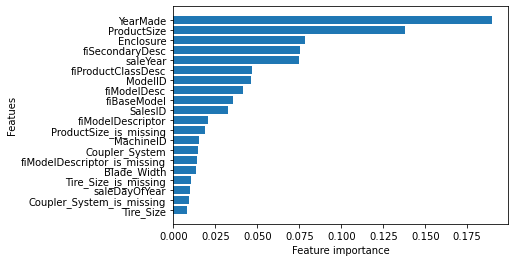

In [60]:
plot_features(X_train.columns, best_model.feature_importances_);